# Constructing Taylor Polynomial with Numerical Derivatives 

The purpose of this project is to construct a Taylor Polynomial in order to extrapolate values within a neighborbood of values when a function is not avaiable to work with.

The first step is to take the first derivative using finite difference methods.

## Import Data: Test Case 

For this example, we will construct vaules using rng function

In [81]:
%matplotlib inline
%reload_ext gnuplot_kernel

import random as rand
import matplotlib.pyplot as plt
import numpy as np

indep_var = []
poly = []
dydx = []
second_order_dydx = []
increment = 1
center = 4
x = 4.3 # Extrapolation Value

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] 
 [5, 0, 3, 3, 6, 9, 6, 9, 0, 5]


Text(0.5, 1.0, 'Test Values')

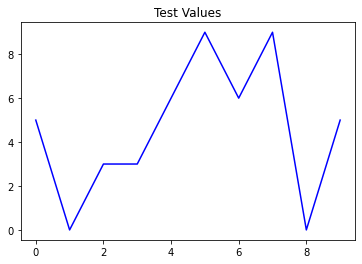

In [82]:
for i in range(10):
    indep_var.append(i)
    poly.append(rand.randrange(10))
    
print(indep_var, "\n", poly)

plt.plot(indep_var,poly, 'b')
plt.title('Test Values')

# Constructing First Order Numerical Derivative

Now we can construct the first derivative using the Finite Difference Method. Observe that $h$ is the step size of the derivateve, and due to the property that $\Delta x = dx$ as $\lim_{x \to 0}$, the behavior of the limit can is represented as the step size $h$. 

[-5.0, -1.0, 1.5, 1.5, 3.0, 0.0, 0.0, -3.0, -2.0, 5.0]


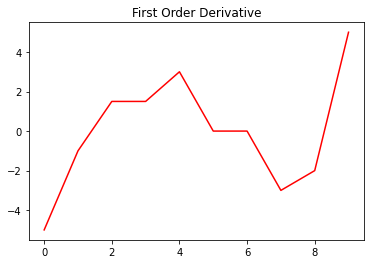

In [83]:
for i in range(10):    
    if(i == 0):
        dydx.append((poly[i + 1] - poly[i]) / 1)       
    if(i == 9):
        dydx.append((poly[i] - poly[i - 1]) / 1)
        break
    elif(i != 0 and i != 9):
        dydx.append((poly[i + 1] - poly[i - 1]) / 2 * 1)
        

plt.plot(indep_var, dydx, 'r')
plt.title('First Order Derivative')
print(dydx)

# Consrtuct Second Order Numerical Derivative

It is important to note that after the first derivative, the computation of constructing higher order derivatives become complex with central difference method. Furthermore, using central difference assumes that the function is differenciable to the third order.

So, we will be using forward and backwards methods which asymptotically behaves to the function to an error of $O(n)$.

[8.0, -3.0, 3.0, 0.0, -6.0, 6.0, -12.0, 14.0, -12.0, 14.0]


Text(0.5, 1.0, 'Second Order Derivative')

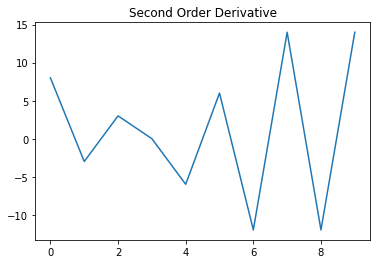

In [84]:
for i in range(10):    
    if(i < 8):
        second_order_dydx.append((poly[i + 2] - 2 * poly[i + 1] + poly[i]) / 1 * 1)               
    elif(i >= 8):
        second_order_dydx.append((poly[i] - 2 * poly[i - 1] + poly[i - 2]) / 1 * 1)
    
print(second_order_dydx)
plt.plot(indep_var, second_order_dydx)
plt.title('Second Order Derivative')

# Visualization

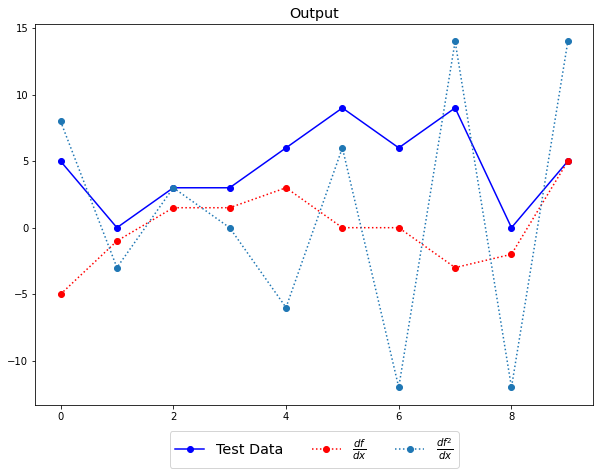

In [85]:
g = plt.figure(figsize = (10,7))
plt.plot(indep_var, poly, 'b', marker = 'o', label = 'Test Data')
plt.plot(indep_var, dydx, 'r', linestyle = ':', marker = 'o', label = r'$\frac{df}{dx}$')
plt.plot(indep_var, second_order_dydx, linestyle = ':', marker = 'o', label = r'$\frac{df^2}{dx}$')
plt.title('Output', fontsize = 'x-large')
plt.legend(loc = 'upper center', bbox_to_anchor = (0.5, -0.05), ncol = 5,fontsize = 'x-large')

In [87]:
taylor_poly = poly[center] + dydx[center] * (x - center) + (second_order_dydx[center] * (x - center)**2 / 2)
# print("$$T_2(", x, ') = ',taylor_poly,' .$$') 
# print("$$T_2(x) = ", poly[center], '+', dydx[center], '* ( x -', center, ') +', '(1/2)', '*', second_order_dydx[center], '* ( x -', center,')^2 .$$')

Tangent lines are first order Taylor Polynomials. So, since we constructed second order derivatives, we can construct a second order Taylor Polynomial for a neighborhood of values. This is particularly useful when trying to extrapolate incremental values! 

It is important to note that this method of extrapolation only works within a specific interval $(r-a)<x<(r+a)$ or $(r-a)\le x \le(r+a) .$ Where $x$ is the value of interest, $r$ is the radius of convergence, and $a$ is the center. Also, in order to determine the approximation error, Taylor's Remainder Theorem must be addressed prior to determining the validity of the values produced by the constructed Taylor Polynomial.

When Constructing the Taylor Polynomial $$T_2(x) = f(4) + f'(4) * (x-4) + (1/2) * f''(4) *  (x-4)^2 .$$

Thus, for this example $$T_2(x) =  6 + 3.0 * ( x - 4 ) + (1/2) * -6.0 * ( x - 4 )^2 .$$ $$T_2( 4.3 ) =  6.63  .$$